In [1]:
!pip install scikit-learn

In [2]:
# import library

import os
import sklearn
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import seaborn as sns

%matplotlib inline
from sklearn.model_selection import cross_val_score
from PIL import Image
from matplotlib.pyplot import imshow
from tensorflow import keras
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

In [3]:
# set directory

healthy_dir = '/content/drive/MyDrive/section4_project/dataset/Brain Tumor Data Set/Healthy'
tumor_dir = '/content/drive/MyDrive/section4_project/dataset/Brain Tumor Data Set/Brain Tumor'

In [4]:
# set file list

filepaths=[]
labels=[]
dir_list=[tumor_dir,healthy_dir] # directory 더하기
for i ,d in enumerate(dir_list): 
    flist=os.listdir(d)
    for f in flist:
        fpath=os.path.join(d,f)
        filepaths.append(fpath)
        if i==0:
          labels.append('0') # tumor: 0
        else:
          labels.append('1') # healthy: 1           
filepaths= pd.Series(filepaths, name='filepaths')
labels=pd.Series(labels, name='labels')    
df=pd.concat([filepaths, labels], axis=1)

In [5]:
df

filepaths labels
0     /content/drive/MyDrive/section4_project/datase...      0
1     /content/drive/MyDrive/section4_project/datase...      0
2     /content/drive/MyDrive/section4_project/datase...      0
3     /content/drive/MyDrive/section4_project/datase...      0
4     /content/drive/MyDrive/section4_project/datase...      0
...                                                 ...    ...
4595  /content/drive/MyDrive/section4_project/datase...      1
4596  /content/drive/MyDrive/section4_project/datase...      1
4597  /content/drive/MyDrive/section4_project/datase...      1
4598  /content/drive/MyDrive/section4_project/datase...      1
4599  /content/drive/MyDrive/section4_project/datase...      1

[4600 rows x 2 columns]

In [6]:
df['labels'].value_counts()

# tumor : 2513
# healthy : 2087

0    2513
1    2087
Name: labels, dtype: int64

0    0.546304
1    0.453696
Name: labels, dtype: float64

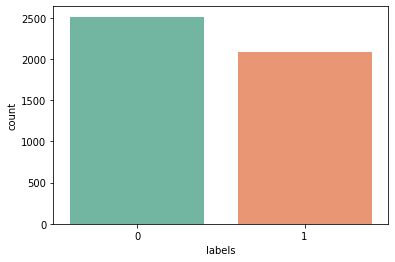

In [7]:
# Chance Level

sns.countplot(x=labels, palette='Set2');

df['labels'].value_counts(normalize=True)

baseline model : 0.546

In [8]:

encoder = OneHotEncoder()
encoder.fit([[0], [1]]) # 0 - tumor, 1 - Healthy

OneHotEncoder()

In [9]:
# from PIL import Image

# data = []

# # 이미지 사이즈 통일하기
# for path in filepaths:
#     img = Image.open(path)
#     img = img.resize((128,128))
#     img = np.array(img)
#     if(img.shape == (128,128,3)):
#         data.append(np.array(img))

In [10]:
# brain tumor

data = []
paths = []
result = []

for dir, d, files in os.walk(tumor_dir):
    for file in files:
        if '.jpg' or '.JPG' or '.tif' or '.png' in file: 
          # file 확장자가 여러가지 있어서 file list에 다 불러와줌
            paths.append(os.path.join(dir, file))

for path in paths:
    img = Image.open(path) 
    img = img.resize((150,150)) # 이미지 크기 통일
    img = np.array(img)
    if(img.shape == (150,150,3)): 
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray()) # tumor 0으로 encoding

In [11]:
#healthy

paths = []
for dir, d, files in os.walk(healthy_dir):
    for file in files:
        if '.jpg' or '.JPG' or '.tif' or '.png' in file:
            paths.append(os.path.join(dir, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((150,150))
    img = np.array(img)
    if(img.shape == (150,150,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray()) # healthy 1으로 encoding

In [12]:
data=np.array(data)
data.shape

(4461, 150, 150, 3)

In [13]:
data

array([[[[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],

        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 1,  1,  1],
         [ 1,  1,  1],
         [ 1,  1,  1]],

        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 2,  2,  2],
         [ 2,  2,  2],
         [ 2,  2,  2]],

        ...,

        [[ 0,  0,  0],
         [ 1,  1,  1],
         [ 1,  1,  1],
         ...,
         [ 4,  4,  4],
         [ 3,  3,  3],
         [ 2,  2,  2]],

        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 2,  2,  2],
         [ 1,  1,  1],
         [ 1,  1,  1]],

        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 1,  1,  1],
         [ 0,  0,  0],
         [ 0,  0,  0]]],


       [[[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0, 

In [14]:
# result = np.array(result)
result = np.array(result).reshape(4461,2) # tumor, healthy classification

# train, test data split

In [15]:
X_train,X_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=42)

In [16]:
print('X_train:',X_train.shape)
print('y_train:',y_train.shape)
print('X_test:',X_test.shape)

X_train: (3568, 150, 150, 3)
y_train: (3568, 2)
X_test: (893, 150, 150, 3)


# Building Model

In [17]:
def create_model():
  model = Sequential()

  model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(150, 150, 3), padding = 'Same'))
  model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.01))

  model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
  model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
  model.add(Dropout(0.01))

  model.add(Flatten())

  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.1))
  model.add(Dense(2, activation='softmax'))

  model.compile(loss = "categorical_crossentropy", optimizer='Adamax',metrics=['accuracy'])
  return model

In [18]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(150, 150, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.01))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.01))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax',metrics=['accuracy'])

In [19]:
print(create_model().summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 150, 150, 32)      416       
                                                                 
 conv2d_5 (Conv2D)           (None, 150, 150, 32)      4128      
                                                                 
 batch_normalization_2 (Batc  (None, 150, 150, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 75, 75, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 75, 75, 64)       

# Cross Validation 

In [30]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold

model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=2, verbose=0)   
kfold = KFold(n_splits=3, shuffle=True, random_state=1) 
results = cross_val_score(model, X_train, y_train, cv=kfold)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  after removing the cwd from sys.path.


In [31]:
print(results)

[0.95630252 0.96888143 0.92851138]


In [21]:
from keras import utils, callbacks
earlystopping = callbacks.EarlyStopping(monitor="val_loss", mode="min", 
                                        patience=5, restore_best_weights = True)

In [22]:
history = model.fit(X_train, y_train, epochs = 50, batch_size = 40, verbose = 1, callbacks = [earlystopping], validation_data = (X_test, y_test))

Epoch 1/50
90/90 [==============================] - 7s 58ms/step - loss: 5.6384 - accuracy: 0.7850 - val_loss: 0.5566 - val_accuracy: 0.7581
Epoch 2/50
90/90 [==============================] - 5s 51ms/step - loss: 0.1950 - accuracy: 0.9168 - val_loss: 0.2838 - val_accuracy: 0.9160
Epoch 3/50
90/90 [==============================] - 5s 51ms/step - loss: 0.1186 - accuracy: 0.9591 - val_loss: 0.1969 - val_accuracy: 0.9451
Epoch 4/50
90/90 [==============================] - 5s 51ms/step - loss: 0.0705 - accuracy: 0.9798 - val_loss: 0.1566 - val_accuracy: 0.9552
Epoch 5/50
90/90 [==============================] - 5s 51ms/step - loss: 0.0465 - accuracy: 0.9879 - val_loss: 0.1443 - val_accuracy: 0.9731
Epoch 6/50
90/90 [==============================] - 4s 50ms/step - loss: 0.0399 - accuracy: 0.9908 - val_loss: 0.1505 - val_accuracy: 0.9664
Epoch 7/50
90/90 [==============================] - 5s 51ms/step - loss: 0.0288 - accuracy: 0.9950 - val_loss: 0.1417 - val_accuracy: 0.9709
Epoch 8/50
90

In [23]:
model.evaluate(X_test, y_test, verbose=2)

28/28 - 1s - loss: 0.1417 - accuracy: 0.9709 - 535ms/epoch - 19ms/step


[0.14170366525650024, 0.9708846807479858]

# Plotting Accuracy

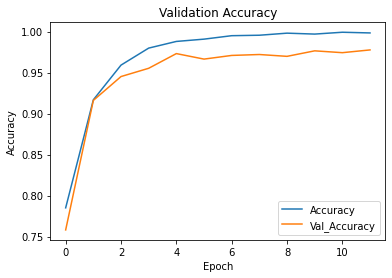

In [24]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Val_Accuracy')
plt.title('Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='best')

# Plotting Loss

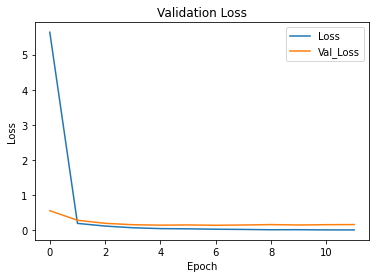

In [25]:
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val_Loss')
plt.title('Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='best')
plt.show()

In [26]:
# Brain Tumor인지 아닌지 검증

def names(number):
    if number==0:
        return 'Brain Tumor'
    else:
        return 'Healthy Brain'

# Testing

91.67949557304382% Confidence 
Healthy Brain


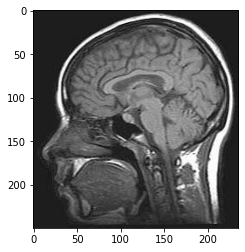

In [27]:
# Testing Healthy brain  

ranchoice = random.choice(os.listdir(healthy_dir)) # healthy_dir 에서 랜덤으로 파일 선택

img = Image.open(os.path.join(healthy_dir,ranchoice)) #healthy_dir와 ranchoice을 연결하여 파일 주소 만듦
x = np.array(img.resize((150,150)))
x = x.reshape(1,150,150,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence ')
print(names(classification))

99.99990463256836% Confidence 
Brain Tumor


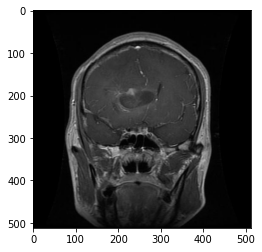

In [28]:
# Testing Tumor brain  

ranchoice = random.choice(os.listdir(tumor_dir)) # tumor_dir 에서 랜덤으로 파일 선택

img = Image.open(os.path.join(tumor_dir,ranchoice)) #tumor_dir와 ranchoice을 연결하여 파일 주소 만듦
x = np.array(img.resize((150,150)))
x = x.reshape(1,150,150,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence ')
print(names(classification))

In [29]:
# y_pred = model.predict(X_test)
# y_pred = np.argmax(y_pred,axis = 1)